# 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


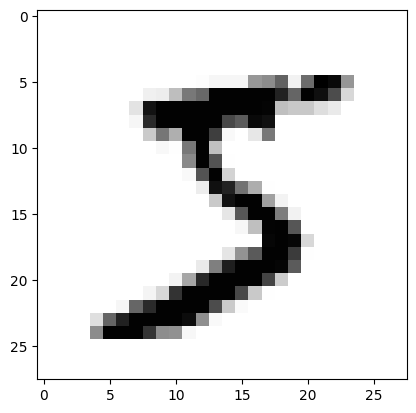

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)  # 가로28, 세로28의 2차원 배열을 784개의 1차원 배열로 변환
X_train = X_train.astype('float64')  # 0~255의 값을 0~1의 값으로 정규화
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))  # 숫자의 레이블

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)  # 0~9사이의 정수형 클래스 값을 원-핫 인코딩
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18417, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18417 to 0.13560, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13560 to 0.10925, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10925 to 0.09700, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09700 to 0.09141, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09141 to 0.08797, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08797

Epoch 8: val_loss improved from 0.08797 to 0.08123, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08123

Epoch 10: val_loss did not improve from 0.08123

Epoch 11: val_loss did not improve from 0.08123

Epoch 12: val_loss did not improve from 0.08123

Epoch 13: val_loss did not improve from 0.08123

Epoch 14: val_loss did not improve from 0.08123

Epoch 15: val_loss did not improve from 0.08123

Epoch 16: val_loss did not improve from 0.08123

Epoch 17: val_loss did not improve from 0.08

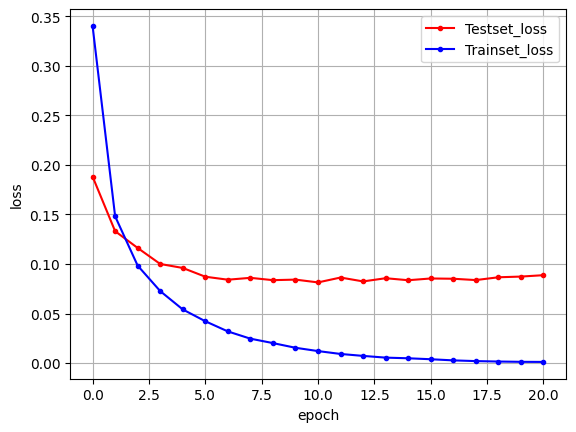

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 5. 컨볼루션 신경망 실행하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,  activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.07749, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07749 to 0.05851, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05851 to 0.05089, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05089 to 0.04426, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04426

Epoch 6: val_loss improved from 0.04426 to 0.04210, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04210

Epoch 8: val_loss did not improve from 0.04210

Epoch 9: val_loss improved from 0.04210 to 0.03959, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03959

Epoch 11: val_loss did not improve from 0.03959

Epoch 12: val_loss did not improve from 0.03959

Epoch 13: val_loss did not improve from 0.03959

Epoch 14: val_loss did not improve from 0.03959

Epoch 15: val_loss did not improve from 0.03959

Epoch 16: val_loss did not improve from 0.03959



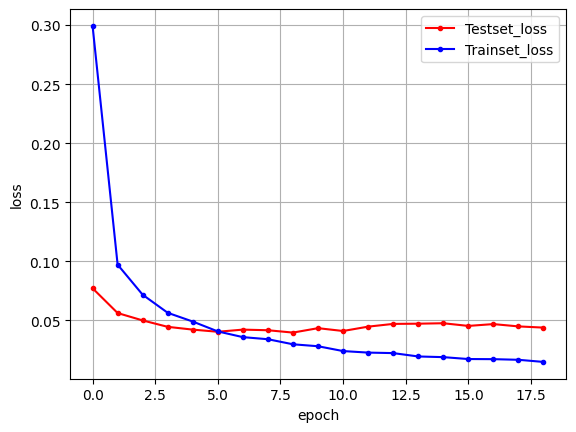

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

number3 = Image.open('number3.png')  # 이미지 파일 열기
number4 = Image.open('number4.png')
number5 = Image.open('number5.png')

images = [number3, number4, number5]
model = load_model('MNIST_CNN.hdf5')

def number(images, model):
  for img in images:
    # 흑백으로 변환
    img_gray = img.convert('L')

    # Numpy 배열로 변환
    img_array = np.array(img_gray)

    # 1차원 배열로 변환, 0~1 사이의 값으로 변환
    img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255

    # 숫자 예측
    result = model.predict(img_array)

    result = np.argmax(result)
    print(f'파일 {img}의 숫자는 {result} 입니다.')

In [ ]:
number(images, model)

1/1 [==============================] - 0s 95ms/step
파일 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x7ACA963B3E50>의 숫자는 0 입니다.
1/1 [==============================] - 0s 25ms/step
파일 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x7ACA961FB730>의 숫자는 2 입니다.
1/1 [==============================] - 0s 29ms/step
파일 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x7ACA961F8CD0>의 숫자는 5 입니다.


In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import IPython.display as display
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 업로드한 이미지 표시 및 파일명 추출
images = []
for filename, content in uploaded.items():
    # 파일을 /content 디렉토리에 저장
    with open(f'/content/{filename}', 'wb') as f:
        f.write(content)
    img = Image.open(filename)
    images.append(img)

# 이미지 객체의 이름을 사용하여 숫자 예측
def number(images, model):
    for img in images:
        # 흑백으로 변환
        img_gray = img.convert('L')

        # Numpy 배열로 변환
        img_array = np.array(img_gray)

        # 1차원 배열로 변환, 0~1 사이의 값으로 변환
        img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255

        # 숫자 예측
        result = model.predict(img_array)

        result = np.argmax(result)
        print(f'파일 {img.filename}의 숫자는 {result} 입니다.')

# number 함수 호출
number(images, model)

Saving number1.png to number1.png
Saving number3.png to number3.png
Saving number4.png to number4.png
Saving number5.png to number5.png
Saving number8.png to number8.png
Saving number9.png to number9.png
1/1 [==============================] - 0s 18ms/step
파일 number1.png의 숫자는 1 입니다.
1/1 [==============================] - 0s 17ms/step
파일 number3.png의 숫자는 0 입니다.
1/1 [==============================] - 0s 19ms/step
파일 number4.png의 숫자는 2 입니다.
1/1 [==============================] - 0s 20ms/step
파일 number5.png의 숫자는 5 입니다.
1/1 [==============================] - 0s 19ms/step
파일 number8.png의 숫자는 3 입니다.
1/1 [==============================] - 0s 18ms/step
파일 number9.png의 숫자는 7 입니다.
